In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import hvplot.pandas

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import train_test_split


from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
Datos = pd.read_csv('./Titanic-Dataset.csv')
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#se cambian los generos por valores enteros
Datos['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [6]:
# Calcula la moda de la columna "Age"
age_mode = Datos['Age'].mode()[0]

# Rellena los valores nulos en la columna "Age" con la moda
Datos['Age'].fillna(age_mode, inplace=True)

In [7]:
#validamos los cambbios efectuados en las columnas 
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


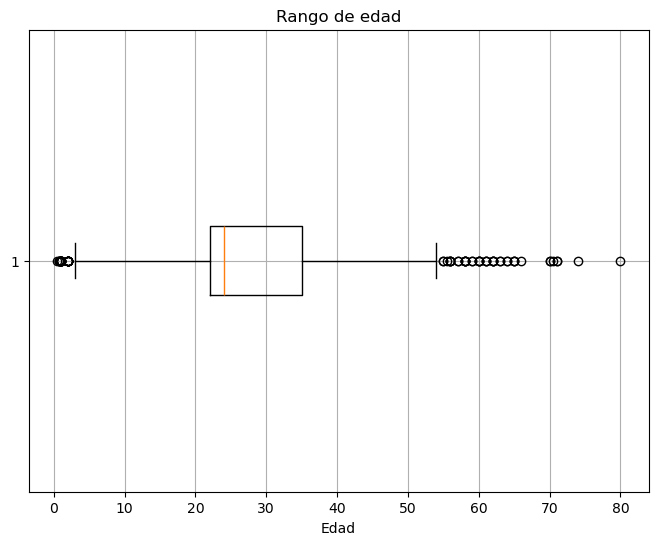

In [8]:
#Identificación de datos en Edad

# Crear el gráfico de caja para la columna 'selling_price'
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(Datos['Age'], vert=False)  # Crear el boxplot
plt.xlabel('Edad')  # Etiqueta del eje x
plt.title('Rango de edad')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula

In [9]:
#eliminamos DAtos Atipicos
nivel_minimo=2
nivel_maximo=67
# filtramos los datos atípicos identificados
Datos=Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]
# verificamos que los datos atípicos se elimanarn
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [10]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  860 non-null    int64  
 1   Survived     860 non-null    int64  
 2   Pclass       860 non-null    int64  
 3   Name         860 non-null    object 
 4   Sex          860 non-null    int64  
 5   Age          860 non-null    float64
 6   SibSp        860 non-null    int64  
 7   Parch        860 non-null    int64  
 8   Ticket       860 non-null    object 
 9   Fare         860 non-null    float64
 10  Cabin        196 non-null    object 
 11  Embarked     858 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 87.3+ KB


In [11]:
# Elimina las columnas que no son necesarias
columnas_a_eliminar = ['Name', 'Ticket', 'Cabin', 'Embarked']
Datos.drop(columns=columnas_a_eliminar, inplace=True)


In [12]:
# Especificamos esto para que el conjunto de datos de entrenamiento y de prueba siempre tenga las mismas filas, respectivamente
np.random.seed(0)
df_train, df_test = train_test_split(Datos, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
x=Datos.drop('Survived', axis=1)

y=Datos['Survived']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
model = LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [17]:
LinearRegression()

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
print (y_test)

151    1
214    0
281    0
268    1
549    1
      ..
101    0
877    0
347    1
271    1
855    1
Name: Survived, Length: 258, dtype: int64


In [20]:
model.coef_

array([ 3.08928935e-06, -1.60018412e-01,  5.33369114e-01, -4.65985110e-03,
       -3.83133147e-02, -3.39653267e-02,  4.44471505e-04])

In [21]:
pd.DataFrame(model.coef_, x.columns, columns=['Coedicients'])

,Coedicients
PassengerId,0.000003
Pclass,-0.160018
Sex,0.533369
Age,-0.004660
SibSp,-0.038313
Parch,-0.033965
Fare,0.000444


In [22]:
y_pred = model.predict(x_test)

In [23]:

print (y_test)

151    1
214    0
281    0
268    1
549    1
      ..
101    0
877    0
347    1
271    1
855    1
Name: Survived, Length: 258, dtype: int64


In [24]:

print (y_pred)

[ 9.74567437e-01  8.58792742e-02  1.05806481e-01  8.50130139e-01
  3.00414562e-01  5.08425334e-01  8.67024292e-01  5.17741947e-01
  1.05923828e-01  3.41247258e-01  7.91999221e-01  1.05281256e-01
  1.32417976e-01  1.24862894e-01  8.31703523e-01  7.10327669e-01
  1.80918790e-01  5.21759703e-02  1.25603149e-01  6.56042882e-01
  1.48012689e-01  5.16538803e-01  8.90021397e-02  6.58397726e-01
  1.02506760e-01  8.91603900e-02  2.74640925e-01  1.57210306e-01
  8.35152967e-01  1.47335388e-01  2.17746859e-01  1.01702656e-01
  8.97873218e-02  1.15169415e-02  1.25928770e-01  1.38804202e-01
  1.31686450e-01  1.33653916e-01  8.25725456e-01  4.41575677e-01
  1.47749353e-01  1.53586970e-01  2.55343502e-01  1.00359273e+00
  1.90371222e-01  1.28333723e-01  7.80569169e-01  4.79732481e-01
  9.94495487e-01  1.23685874e-01  6.28981048e-01  1.44293443e-01
  7.64402928e-01  1.40499260e-01  1.66852337e-02  5.94529258e-01
  6.76176853e-01 -2.22436421e-01  1.23873147e-01  1.25444446e-01
  4.17691274e-02  4.42641

In [25]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [26]:
MAE

0.27988708742429536

In [27]:
MSE

0.13357498813715127

In [28]:
RMSE

0.3654791213423159

In [29]:
test_residual= y_test - y_pred

In [30]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

C:\Users\Cyramirezp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


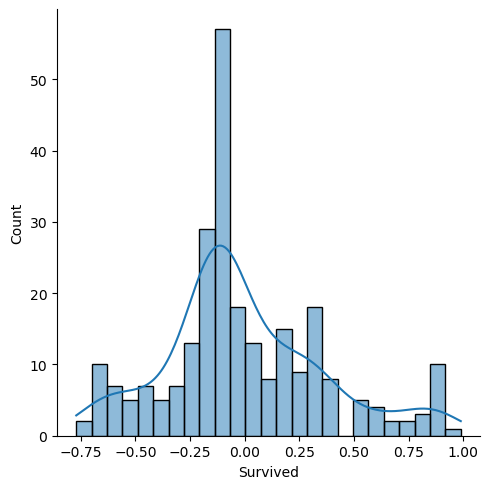

In [31]:

sns.displot(test_residual, bins=25, kde=True)

<Axes: xlabel='Survived', ylabel='Survived'>

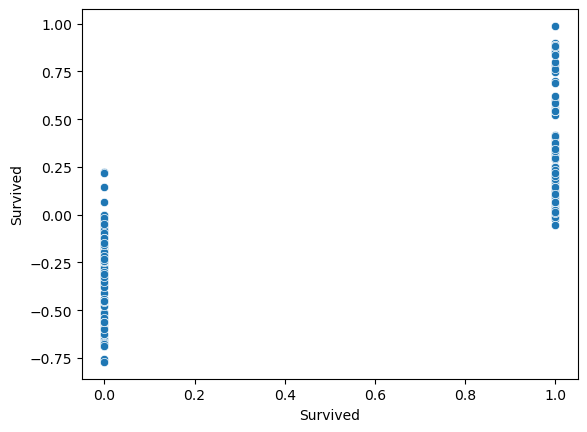

In [32]:
sns.scatterplot(x=y_test, y=test_residual)

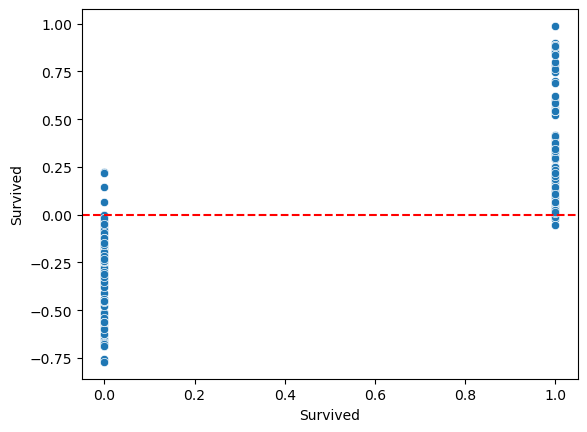

In [33]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')